In [9]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12477 (\N{KATAKANA LETTER SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-

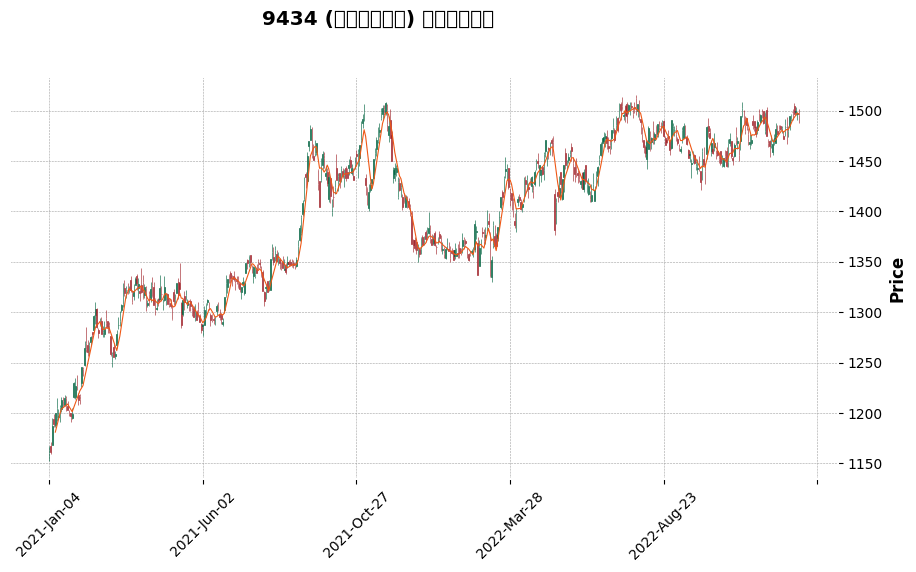

In [14]:
import mplfinance as mpf
import datetime as dt
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語フォントを直接指定
#rcParams['font.family'] = '/usr/share/fonts/opentype/ipaexfont-mincho/ipaexm.ttf'  # Linuxの場合
# Windowsの場合の例
rcParams['font.family'] = 'C:/Windows/Fonts/msgothic.ttc'

# データの取得
df = pdr.DataReader("9434.JP", "stooq").sort_index()

# 日付範囲の選択（2021年1月1日から2022年12月31日まで）
cdf = df[dt.datetime(2021, 1, 1):dt.datetime(2022, 12, 31)]

# チャートのプロット
mpf.plot(
    cdf,
    type="candle",  # ロウソク足
    mav=(5,),  # 移動平均線（5日）
    title="9434 (ソフトバンク) 株価チャート",  # 日本語タイトル
    figratio=(2, 1),  # 図の比率
    style="charles"  # プロットのスタイル
)

# プロットを表示
plt.show()


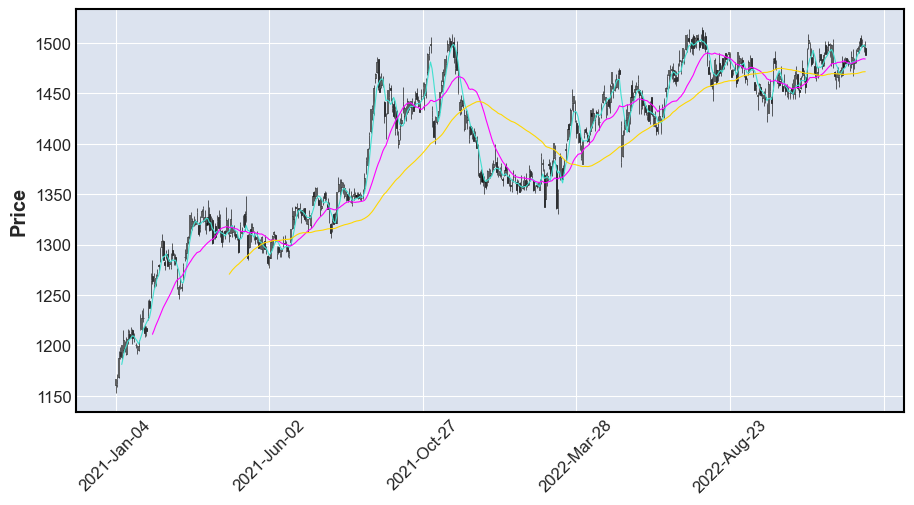

In [11]:
mpf.plot(cdf, type="candle", mav=(5, 25, 75), figratio=(2,1))

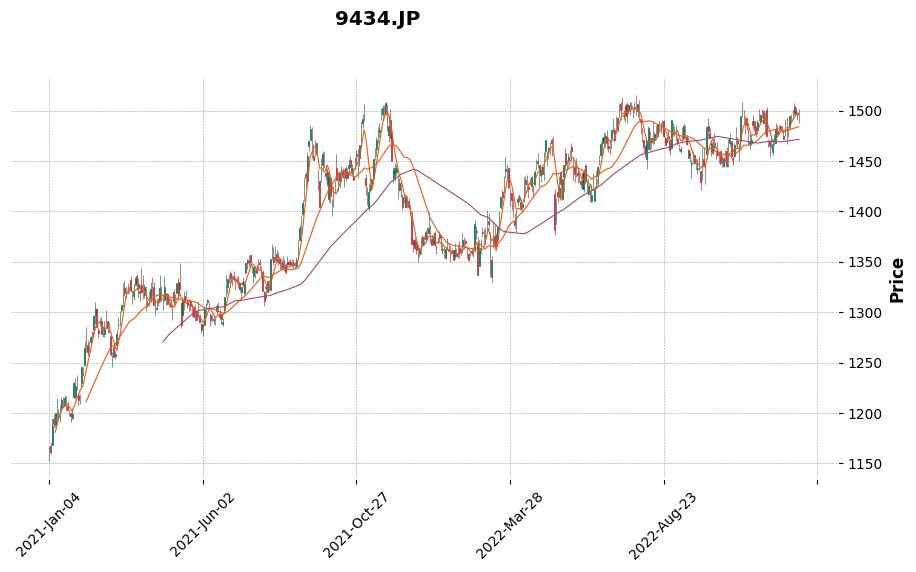

In [ ]:
import mplfinance as mpf
import datetime as dt
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語フォントを設定（環境に合わせて変更）
#rcParams['font.family'] = '/usr/share/fonts/opentype/ipaexfont-mincho/ipaexm.ttf'  # Linuxの場合
# Windowsの場合
rcParams['font.family'] = 'C:/Windows/Fonts/msgothic.ttc'
# Macの場合
# rcParams['font.family'] = '/System/Library/Fonts/Supplemental/Hiragino Sans.ttf'

# データの取得
df = pdr.DataReader("9434.JP", "stooq").sort_index()

# 日付範囲の選択（2021年1月1日から2022年12月31日まで）
cdf = df[dt.datetime(2021, 1, 1):dt.datetime(2022, 12, 31)]

# チャートのプロット
mpf.plot(
    cdf,
    type="candle",  # ロウソク足
    mav=(5, 25, 75),  # 移動平均線（5日、25日、75日）
    title="9434.JP",  # 証券コードをタイトルに設定
    figratio=(2, 1),  # 図の比率
    style="charles"  # プロットのスタイル
)

# プロットを表示
plt.show()


C:\Users\flare\AppData\Local\Temp\ipykernel_6596\1980969366.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles
C:\Users\flare\AppData\Local\Temp\ipykernel_6596\1980969366.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


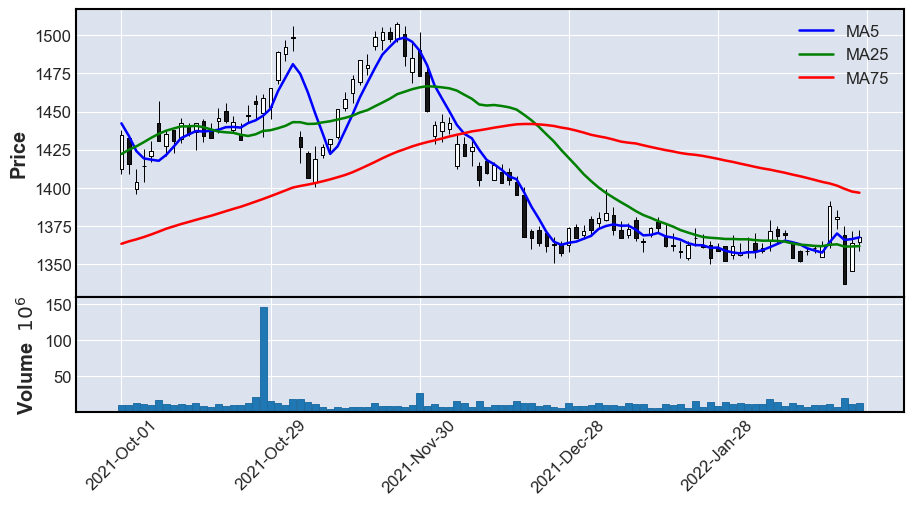

In [12]:
df["ma5"]   = df["Close"].rolling(window=5).mean()
df["ma25"]  = df["Close"].rolling(window=25).mean()
df["ma75"]  = df["Close"].rolling(window=75).mean()

cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,2,28)]

apd = { "MA5": mpf.make_addplot(cdf["ma5"], color="blue"),
         "MA25": mpf.make_addplot(cdf["ma25"], color="green"),
         "MA75": mpf.make_addplot(cdf["ma75"], color="red") }

 # 描画情報を取得
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True, volume=True)
# ラベルを追加 
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))

# チャートを表示
fig.show()